In [786]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [787]:
df = pd.read_csv('bank-full.csv',sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [94]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:>

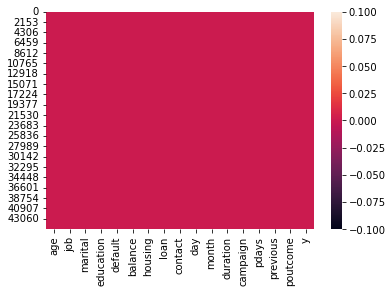

In [95]:
sns.heatmap(df.isnull())

In [96]:
df.shape

(45211, 17)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [777]:
df1 = pd.read_csv('bank-full.csv',sep = ';')
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [778]:
df1['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [98]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

In [99]:
def days_last_contacted(pdays):
    if pdays == -1:
        return 'Not Contacted'
    elif pdays < 8:
        return 'One week or less'
    elif pdays > 7 and pdays < 32:
        return 'One week to one Month'
    elif pdays >31 and pdays < 366:
        return 'One Month to one Year'
    else:
        return 'Greater than one Year'

In [100]:
df['Days Contacted'] = df['pdays'].apply(days_last_contacted)
df['Days Contacted'].tail()

45206            Not Contacted
45207            Not Contacted
45208    One Month to one Year
45209            Not Contacted
45210    One Month to one Year
Name: Days Contacted, dtype: object

In [10]:
#df = df.drop('pdays',axis=1)

In [101]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Days Contacted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Not Contacted
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Not Contacted


In [102]:
df['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [103]:
df['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [104]:
def last_contacted_month(month):
    if month == 'jan':
        return 1
    elif month == 'feb':
        return 2
    elif month == 'mar':
        return 3
    elif month == 'apr':
        return 4
    elif month == 'may':
        return 5
    elif month == 'jun':
        return 6
    elif month == 'july':
        return 7
    elif month == 'aug':
        return 8
    elif month == 'sep':
        return 9
    elif month == 'oct':
        return 10
    elif month == 'nov':
        return 11
    elif month == 'dec':
        return 12
    else:
        return '13'
    

In [105]:
df['Month Contacted'] = df['month'].apply(last_contacted_month)
df['Month Contacted'].head()

0    5
1    5
2    5
3    5
4    5
Name: Month Contacted, dtype: object

In [106]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Days Contacted,Month Contacted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Not Contacted,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Not Contacted,5


In [107]:
df['Month Contacted'].value_counts()

5     13766
13     6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: Month Contacted, dtype: int64

In [108]:
df['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [109]:
#df = df.drop('month',axis=1)

In [110]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Days Contacted,Month Contacted
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,Not Contacted,11
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,Not Contacted,11
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,One Month to one Year,11
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,Not Contacted,11
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no,One Month to one Year,11


In [111]:
df['Month Contacted'].value_counts()

5     13766
13     6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: Month Contacted, dtype: int64

/Users/avneetthakur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

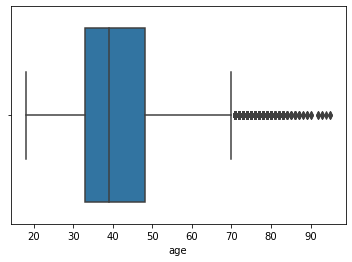

In [112]:
sns.boxplot(df['age'])

/Users/avneetthakur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

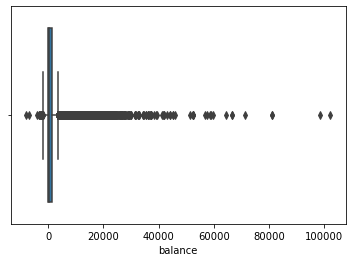

In [113]:
sns.boxplot(df['balance'])

In [114]:
df.drop(df[df['balance']>8000].index,inplace=True)

In [115]:
df.drop(df[df['balance']< -6000].index,inplace=True)

/Users/avneetthakur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

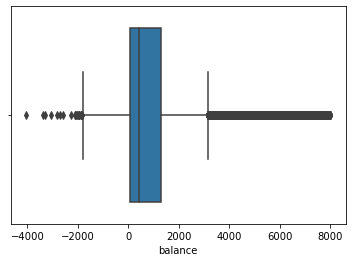

In [116]:
sns.boxplot(df['balance'])

/Users/avneetthakur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

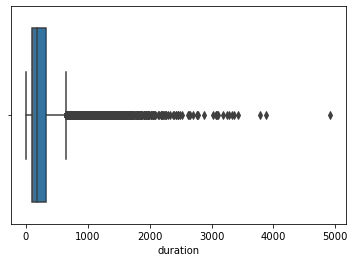

In [117]:
sns.boxplot(df['duration'])

In [118]:
df.drop(df[df['duration']>4000].index,inplace=True)

/Users/avneetthakur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

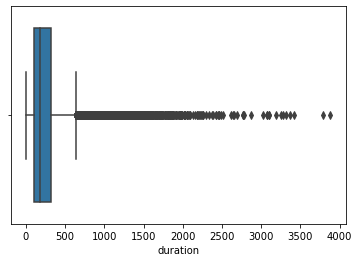

In [119]:
sns.boxplot(df['duration'])

In [120]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Days Contacted,Month Contacted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Not Contacted,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Not Contacted,5


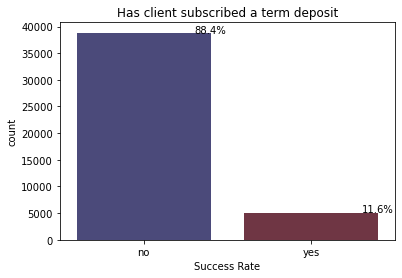

In [121]:
ax = sns.countplot(x = 'y',data=df,palette='icefire')
plt.xlabel('Success Rate')
plt.title('Has client subscribed a term deposit')

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x() + i.get_width()
    y = i.get_height()
    ax.annotate(percentage, (x, y), ha = 'center')

In [411]:
#pip install seaborn

In [122]:
cols = ['age','balance','duration']

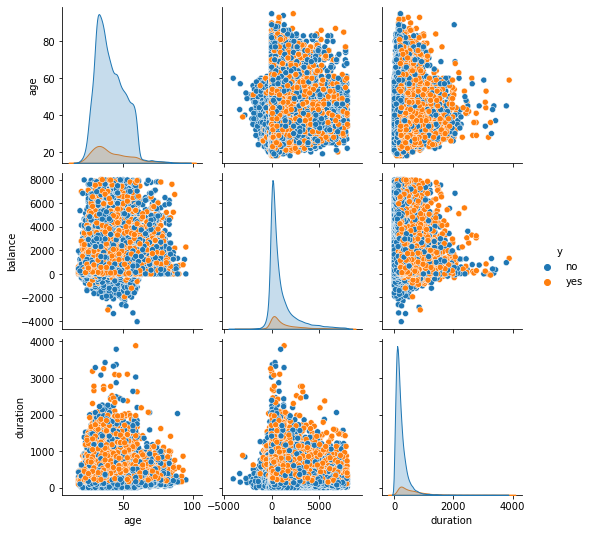

In [123]:
sns.pairplot(data = df, x_vars = cols, y_vars = cols, hue = 'y')

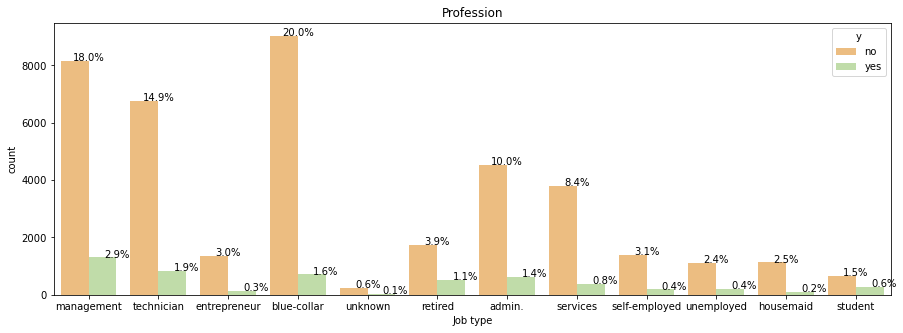

In [799]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='job',hue='y',data=df1,palette='Spectral')
plt.xlabel('Job type')
plt.title('Profession')

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x() + i.get_width()
    y = i.get_height()
    ax.annotate(percentage, (x, y), ha = 'center')

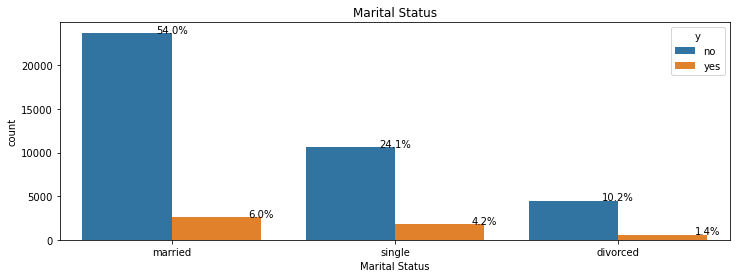

In [125]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x='marital',hue='y',data=df)
plt.xlabel('Marital Status')
plt.title('Marital Status')

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x() + i.get_width()
    y = i.get_height()
    ax.annotate(percentage, (x, y), ha = 'center')

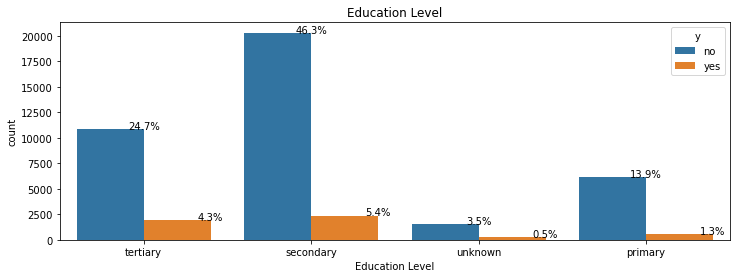

In [126]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x='education',hue='y',data=df)
plt.xlabel('Education Level')
plt.title('Education Level')

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x() + i.get_width()
    y = i.get_height()
    ax.annotate(percentage, (x, y), ha = 'center')

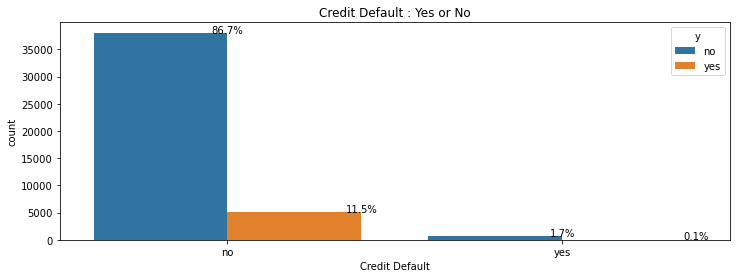

In [127]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x='default',hue='y',data=df)
plt.xlabel('Credit Default')
plt.title('Credit Default : Yes or No')

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x() + i.get_width()
    y = i.get_height()
    ax.annotate(percentage, (x, y), ha = 'center')

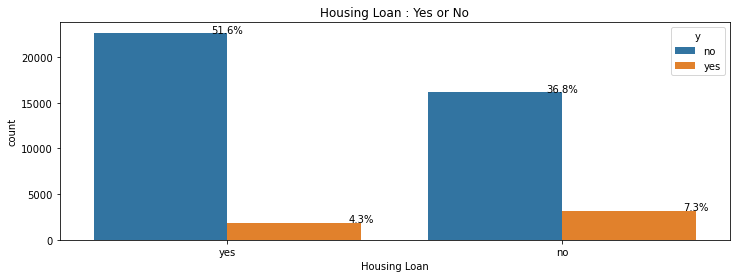

In [128]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x='housing',hue='y',data=df)
plt.xlabel('Housing Loan')
plt.title('Housing Loan : Yes or No')

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x() + i.get_width()
    y = i.get_height()
    ax.annotate(percentage, (x, y), ha = 'center')

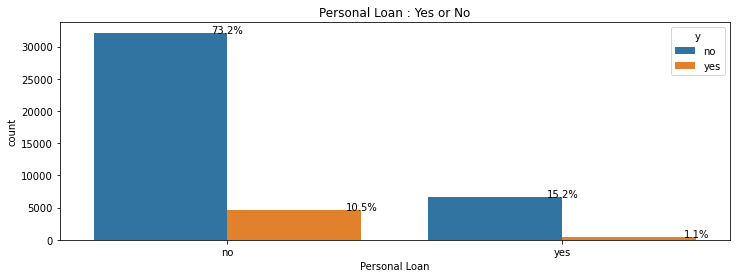

In [129]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x='loan',hue='y',data=df)
plt.xlabel('Personal Loan')
plt.title('Personal Loan : Yes or No')

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x() + i.get_width()
    y = i.get_height()
    ax.annotate(percentage, (x, y), ha = 'center')

<AxesSubplot:xlabel='age', ylabel='count'>

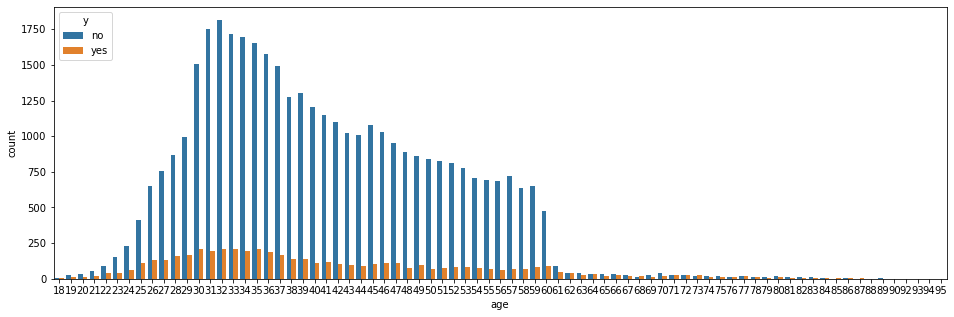

In [130]:
plt.figure(figsize=(16,5))
sns.countplot(x='age',hue='y',data=df)

/Users/avneetthakur/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

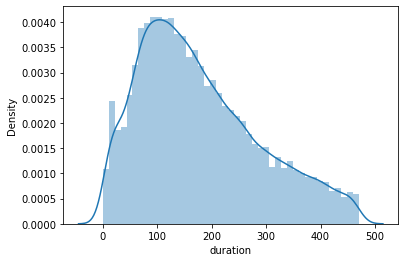

In [775]:
sns.distplot(df.duration)

/Users/avneetthakur/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

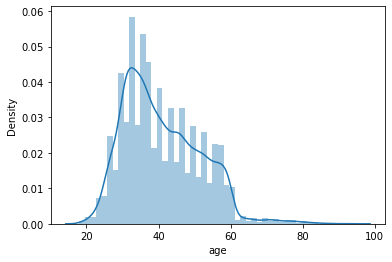

In [131]:
sns.distplot(df.age)

In [788]:
def age_group(age):
    if age < 22:
        return 'teenagers'
    elif age < 35:
        return 'Young'
    elif age < 55:
        return 'Middle'
    else:
        return 'Senior'

In [789]:
df['Age Group'] = df['age'].apply(age_group)
df['Age Group'].tail()

45206    Middle
45207    Senior
45208    Senior
45209    Senior
45210    Middle
Name: Age Group, dtype: object

In [790]:
df['Age Group'].value_counts()

Middle       24492
Young        14837
Senior        5706
teenagers      176
Name: Age Group, dtype: int64

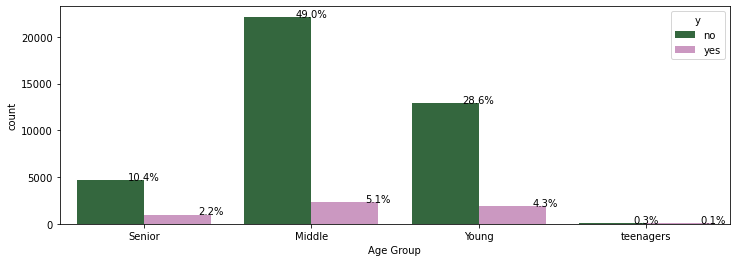

In [792]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x='Age Group',hue='y',data=df,palette='cubehelix')

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x() + i.get_width()
    y = i.get_height()
    ax.annotate(percentage, (x, y), ha = 'center')

In [136]:
df.tail(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Days Contacted,Month Contacted,Age Group
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,Not Contacted,11,Senior
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no,One Month to one Year,11,Middle


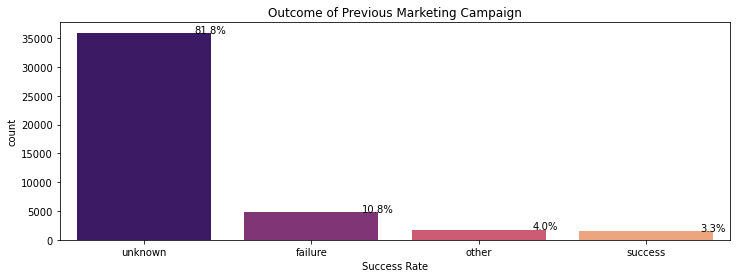

In [137]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x='poutcome',data=df,palette='magma')
plt.xlabel('Success Rate')
plt.title('Outcome of Previous Marketing Campaign')

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x() + i.get_width()
    y = i.get_height()
    ax.annotate(percentage, (x, y), ha = 'center')

<AxesSubplot:xlabel='balance', ylabel='day'>

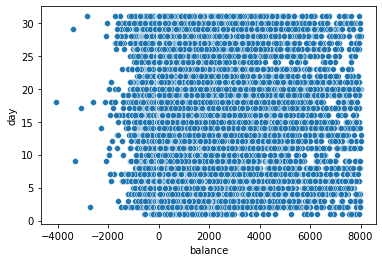

In [138]:
sns.scatterplot(x='balance',y='day',data=df)

/Users/avneetthakur/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balance', ylabel='Density'>

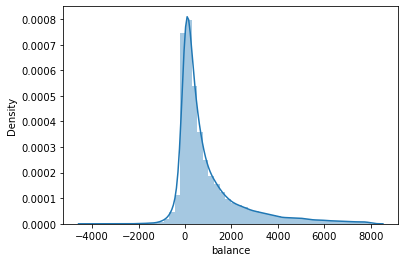

In [139]:
sns.distplot(df.balance)

In [140]:
def account_balance(balance):
    if balance <= 0:
        return 'Negative Balance'
    elif balance >= 0 and balance <= 2000:
        return 'Low Balance'
    elif balance >= 2000 and balance <= 4000:
        return 'Medium Balance'
    else:
        return 'High Balance'

In [141]:
df['Account Balance'] = df['balance'].apply(account_balance)
df['Account Balance'].head()

0    Medium Balance
1       Low Balance
2       Low Balance
3       Low Balance
4       Low Balance
Name: Account Balance, dtype: object

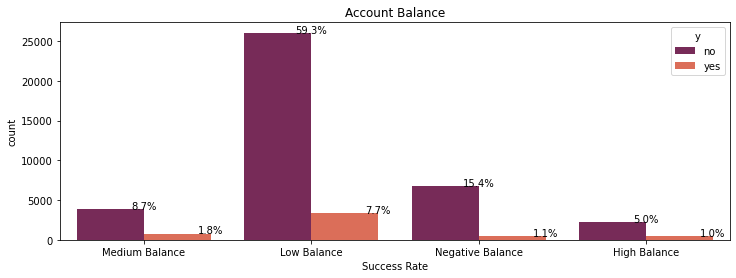

In [142]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x='Account Balance',hue='y',data=df,palette='rocket')
plt.xlabel('Success Rate')
plt.title('Account Balance')

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x() + i.get_width()
    y = i.get_height()
    ax.annotate(percentage, (x, y), ha = 'center')

In [143]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,Days Contacted,Month Contacted,Age Group,Account Balance
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,Not Contacted,5,Senior,Medium Balance
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,Not Contacted,5,Middle,Low Balance
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,Not Contacted,5,Young,Low Balance
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,Not Contacted,5,Middle,Low Balance
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,no,Not Contacted,5,Young,Low Balance


In [144]:
df.groupby('job')['balance']

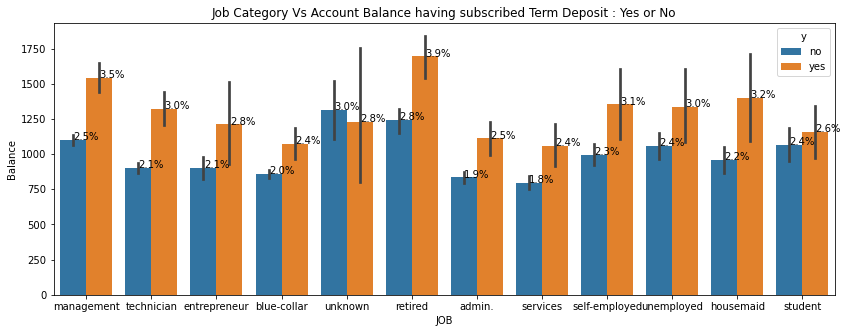

In [145]:
plt.figure(figsize = (14,5))
ax = sns.barplot(data=df, x='job',y='balance',hue='y')
plt.xlabel('JOB')
plt.ylabel('Balance')
plt.title('Job Category Vs Account Balance having subscribed Term Deposit : Yes or No')

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x() + i.get_width()
    y = i.get_height()
    ax.annotate(percentage, (x, y), ha = 'center')

In [146]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,Days Contacted,Month Contacted,Age Group,Account Balance
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,Not Contacted,5,Senior,Medium Balance
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,Not Contacted,5,Middle,Low Balance


In [147]:
df['default'].value_counts()

no     43117
yes      812
Name: default, dtype: int64

In [148]:
def default_status(default):
    if default == 'yes':
        return 1
    else:
        return 0


In [149]:
df['default'] = df['default'].apply(default_status)
df['default'].head()

0    0
1    0
2    0
3    0
4    0
Name: default, dtype: int64

In [150]:
df['default'].value_counts()

0    43117
1      812
Name: default, dtype: int64

In [151]:
df['loan'].value_counts()

no     36757
yes     7172
Name: loan, dtype: int64

In [152]:
def loan_statues(loan):
    if loan == 'no':
        return 0
    else:
        return 1



In [153]:
df['loan'] = df['loan'].apply(loan_statues)
df['loan'].head()

0    0
1    0
2    1
3    0
4    0
Name: loan, dtype: int64

In [154]:
df['loan'].value_counts()

0    36757
1     7172
Name: loan, dtype: int64

In [155]:
def housing_statues(housing):
    if housing == 'no':
        return 0
    else:
        return 1



In [156]:
df['housing'] = df['housing'].apply(housing_statues)
df['housing'].head()

0    1
1    1
2    1
3    1
4    0
Name: housing, dtype: int64

In [157]:
df['housing'].value_counts()

1    24565
0    19364
Name: housing, dtype: int64

In [158]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,Days Contacted,Month Contacted,Age Group,Account Balance
0,58,management,married,tertiary,0,2143,1,0,unknown,5,...,261,1,-1,0,unknown,no,Not Contacted,5,Senior,Medium Balance
1,44,technician,single,secondary,0,29,1,0,unknown,5,...,151,1,-1,0,unknown,no,Not Contacted,5,Middle,Low Balance
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,...,76,1,-1,0,unknown,no,Not Contacted,5,Young,Low Balance
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,...,92,1,-1,0,unknown,no,Not Contacted,5,Middle,Low Balance
4,33,unknown,single,unknown,0,1,0,0,unknown,5,...,198,1,-1,0,unknown,no,Not Contacted,5,Young,Low Balance


Text(0.5, 1.0, 'Job Category Vs Housing Loan having subscribed Term Deposit : Yes or No')

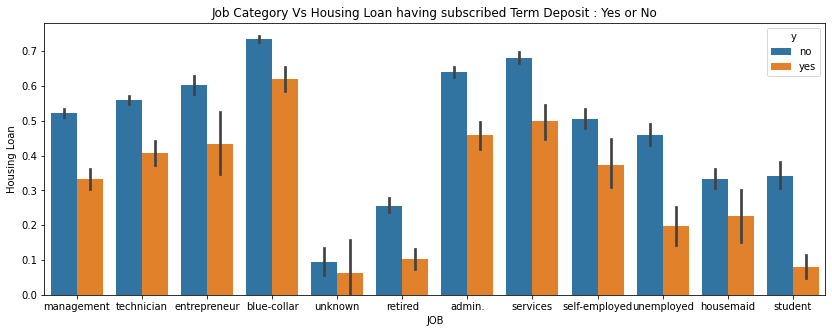

In [159]:
plt.figure(figsize = (14,5))
sns.barplot(data=df, x='job',y='housing',hue='y')
plt.xlabel('JOB')
plt.ylabel('Housing Loan')
plt.title('Job Category Vs Housing Loan having subscribed Term Deposit : Yes or No')

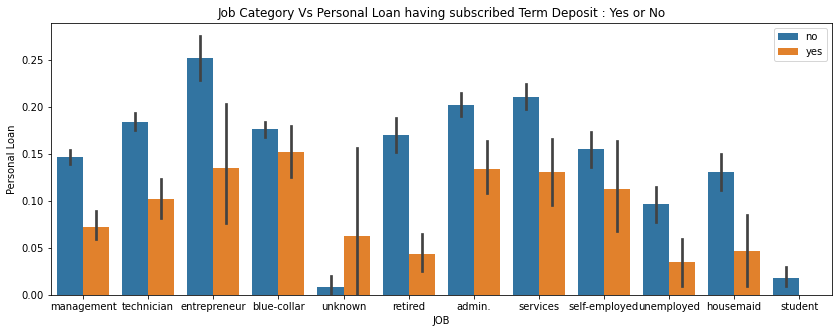

In [160]:
plt.figure(figsize = (14,5))
sns.barplot(data=df, x='job',y='loan',hue='y')
plt.xlabel('JOB')
plt.ylabel('Personal Loan')
plt.title('Job Category Vs Personal Loan having subscribed Term Deposit : Yes or No')
plt.legend()

Text(0.5, 1.0, 'Job Category Vs Credit Default having subscribed Term Deposit : Yes or No')

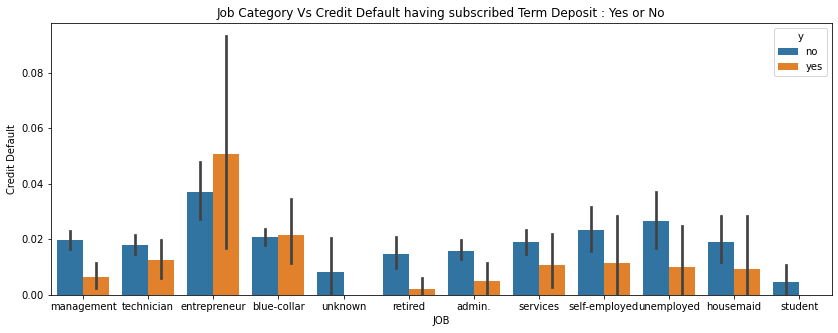

In [161]:
plt.figure(figsize = (14,5))
sns.barplot(data=df, x='job',y='default',hue='y')
plt.xlabel('JOB')
plt.ylabel('Credit Default')
plt.title('Job Category Vs Credit Default having subscribed Term Deposit : Yes or No')

Text(0.5, 1.0, 'Call Duration(sec) Vs Subscription to Term Deposit : Yes or No')

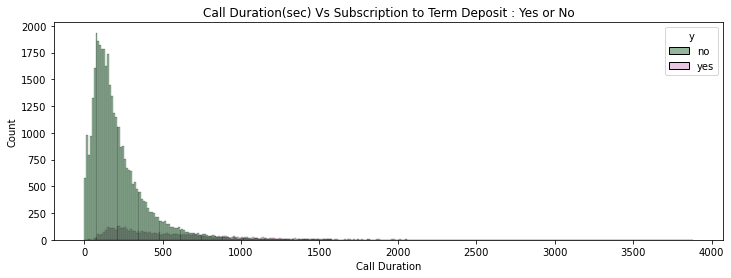

In [162]:
plt.figure(figsize=(12,4))
ax = sns.histplot(x='duration',hue='y',data=df,palette='cubehelix')
plt.xlabel('Call Duration')
plt.title('Call Duration(sec) Vs Subscription to Term Deposit : Yes or No')

Text(0.5, 1.0, 'Contact Via Vs Subscription to Term Deposit : Yes or No')

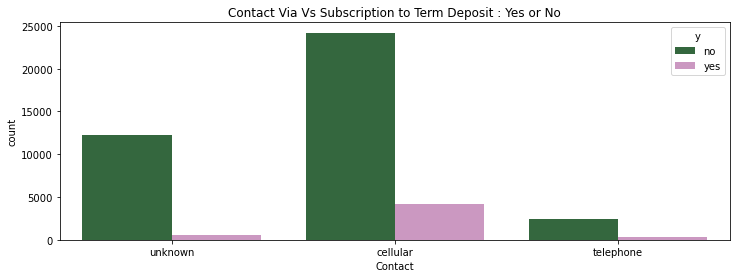

In [163]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x='contact',hue='y',data=df,palette='cubehelix')
plt.xlabel('Contact')
plt.title('Contact Via Vs Subscription to Term Deposit : Yes or No')

Text(0.5, 1.0, 'Previous Year Outcome Vs Subscription to Term Deposit : Yes or No')

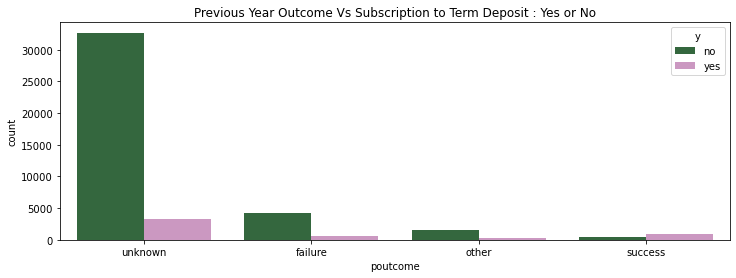

In [164]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x='poutcome',hue='y',data=df,palette='cubehelix')
plt.xlabel('poutcome')
plt.title('Previous Year Outcome Vs Subscription to Term Deposit : Yes or No')

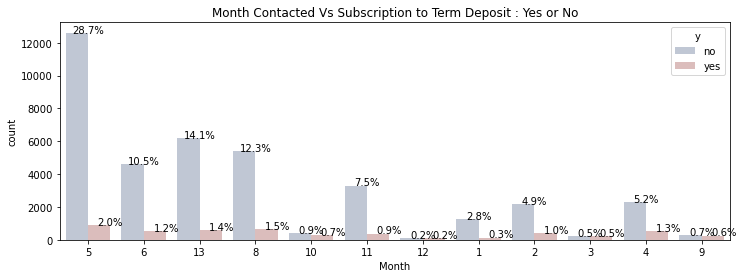

In [165]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x='Month Contacted',hue='y',data=df,palette='vlag')
plt.xlabel('Month')
plt.title('Month Contacted Vs Subscription to Term Deposit : Yes or No')

for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x() + i.get_width()
    y = i.get_height()
    ax.annotate(percentage, (x, y), ha = 'center')

In [166]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,Days Contacted,Month Contacted,Age Group,Account Balance
0,58,management,married,tertiary,0,2143,1,0,unknown,5,...,261,1,-1,0,unknown,no,Not Contacted,5,Senior,Medium Balance
1,44,technician,single,secondary,0,29,1,0,unknown,5,...,151,1,-1,0,unknown,no,Not Contacted,5,Middle,Low Balance
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,...,76,1,-1,0,unknown,no,Not Contacted,5,Young,Low Balance
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,...,92,1,-1,0,unknown,no,Not Contacted,5,Middle,Low Balance
4,33,unknown,single,unknown,0,1,0,0,unknown,5,...,198,1,-1,0,unknown,no,Not Contacted,5,Young,Low Balance


In [167]:
# dropping 'age group' column since i have categorised the ages only for visualisation purposes.
df = df.drop('Age Group',axis = 1)
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Days Contacted,Month Contacted,Account Balance
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no,Not Contacted,5,Medium Balance
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no,Not Contacted,5,Low Balance


In [168]:
# dropping 'account balance' column 
# since i have categorised the balance into groups only for visualisation purposes.
df = df.drop('Account Balance',axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Days Contacted,Month Contacted
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no,Not Contacted,5
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no,Not Contacted,5
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,no,Not Contacted,5
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no,Not Contacted,5
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no,Not Contacted,5


In [169]:
def y_status(y):
    if y == 'yes':
        return 1
    else:
        return 0

In [170]:
df['y'] = df['y'].apply(y_status)
df['y'].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [171]:
df['y'].value_counts()

0    38835
1     5094
Name: y, dtype: int64

In [172]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Days Contacted,Month Contacted
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0,Not Contacted,5
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0,Not Contacted,5
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0,Not Contacted,5
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0,Not Contacted,5
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0,Not Contacted,5


In [173]:
# dropping 'month' as it is been converted into numericals using function and
# dropping 'Days Contacted' as it is created only for visualisation purposes.
df = df.drop(['Month Contacted','Days Contacted'],axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [630]:
# performing label encoder to avoid curse of dimentionality since 'job' column has many categorical variables.
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()
#print(label_encoder)

#new_data["job"] = label_encoder.fit_transform(new_data["job"])
#new_data["marital"] = label_encoder.fit_transform(new_data["marital"])
#new_data["education"] = label_encoder.fit_transform(new_data["education"])

#new_data["contact"] = label_encoder.fit_transform(new_data["contact"])
#new_data["poutcome"] = label_encoder.fit_transform(new_data["poutcome"])
#new_data["y"] = label_encoder.fit_transform(new_data["y"])

#new_data["Days Contacted"] = label_encoder.fit_transform(new_data["Days Contacted"])
#new_data["Age Group"] = label_encoder.fit_transform(new_data["Age Group"])
#new_data["Account Balance"] = label_encoder.fit_transform(new_data["Account Balance"])


LabelEncoder()


/Users/avneetthakur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

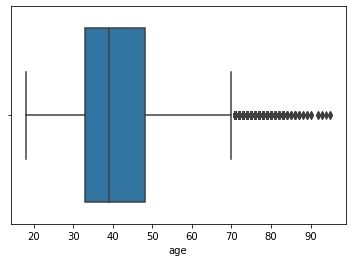

In [174]:
sns.boxplot(df['age'])

In [175]:
df.drop(df[df['age']>50].index,inplace=True)

/Users/avneetthakur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

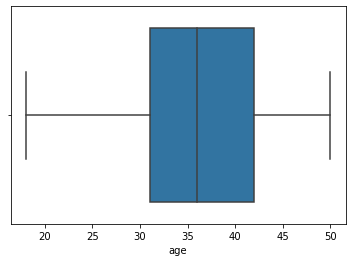

In [177]:
sns.boxplot(df['age'])

/Users/avneetthakur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

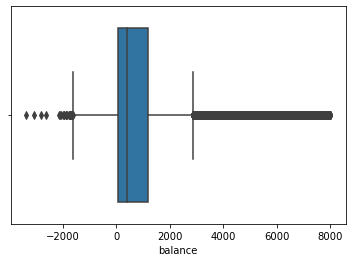

In [178]:
sns.boxplot(df['balance'])

In [179]:
df.drop(df[df['balance']>1200].index,inplace=True)

In [180]:
df.drop(df[df['balance']<-600].index,inplace=True)

/Users/avneetthakur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

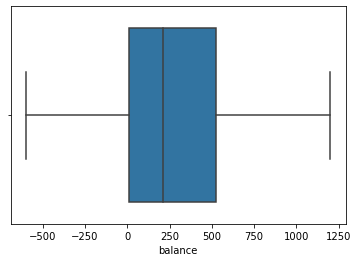

In [181]:
sns.boxplot(df['balance'])

/Users/avneetthakur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

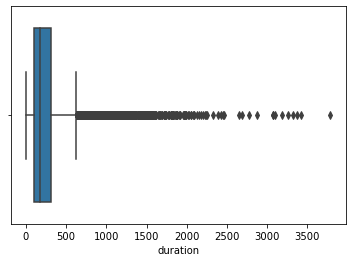

In [182]:
sns.boxplot(df['duration'])

In [187]:
df.drop(df[df['duration']>470].index,inplace=True)

/Users/avneetthakur/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

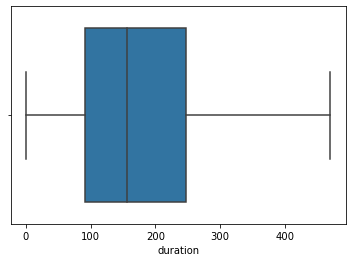

In [188]:
sns.boxplot(df['duration'])

In [189]:
df.shape

(22699, 17)

In [190]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0


<AxesSubplot:>

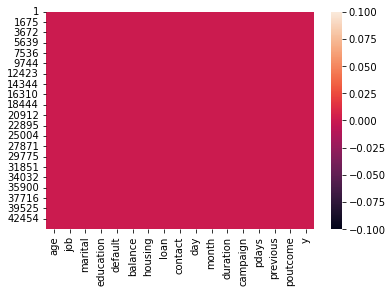

In [192]:
sns.heatmap(df.isnull())

In [1231]:
df.shape

(17389, 17)

<AxesSubplot:>

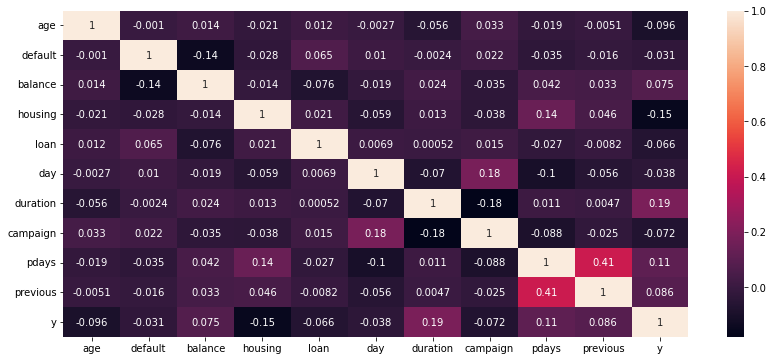

In [191]:
plt.figure(figsize=[14,6])
sns.heatmap(df.corr(),annot=True)

In [193]:
# spiliting the data into numerical and category columns to identify between numeric and character columns.
numerical_cols = df.select_dtypes(include=[np.number])
numerical_cols 

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
1,44,0,29,1,0,5,151,1,-1,0,0
2,33,0,2,1,1,5,76,1,-1,0,0
4,33,0,1,0,0,5,198,1,-1,0,0
5,35,0,231,1,0,5,139,1,-1,0,0
6,28,0,447,1,1,5,217,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45193,28,0,159,0,0,16,449,2,33,4,1
45196,25,0,358,0,0,16,330,1,-1,0,1
45202,34,0,557,0,0,17,224,1,-1,0,1
45203,23,0,113,0,0,17,266,1,-1,0,1


In [194]:
character_cols = df.select_dtypes(include=[object])
character_cols

,job,marital,education,contact,month,poutcome
1,technician,single,secondary,unknown,may,unknown
2,entrepreneur,married,secondary,unknown,may,unknown
4,unknown,single,unknown,unknown,may,unknown
5,management,married,tertiary,unknown,may,unknown
6,management,single,tertiary,unknown,may,unknown
...,...,...,...,...,...,...
45193,self-employed,single,tertiary,cellular,nov,success
45196,student,single,secondary,cellular,nov,unknown
45202,admin.,single,secondary,cellular,nov,unknown
45203,student,single,tertiary,cellular,nov,unknown


In [197]:
data = df
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0


In [199]:
bank_data = pd.get_dummies(data,drop_first=True)

In [200]:
bank_data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
5,35,0,231,1,0,5,139,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
6,28,0,447,1,1,5,217,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


<AxesSubplot:>

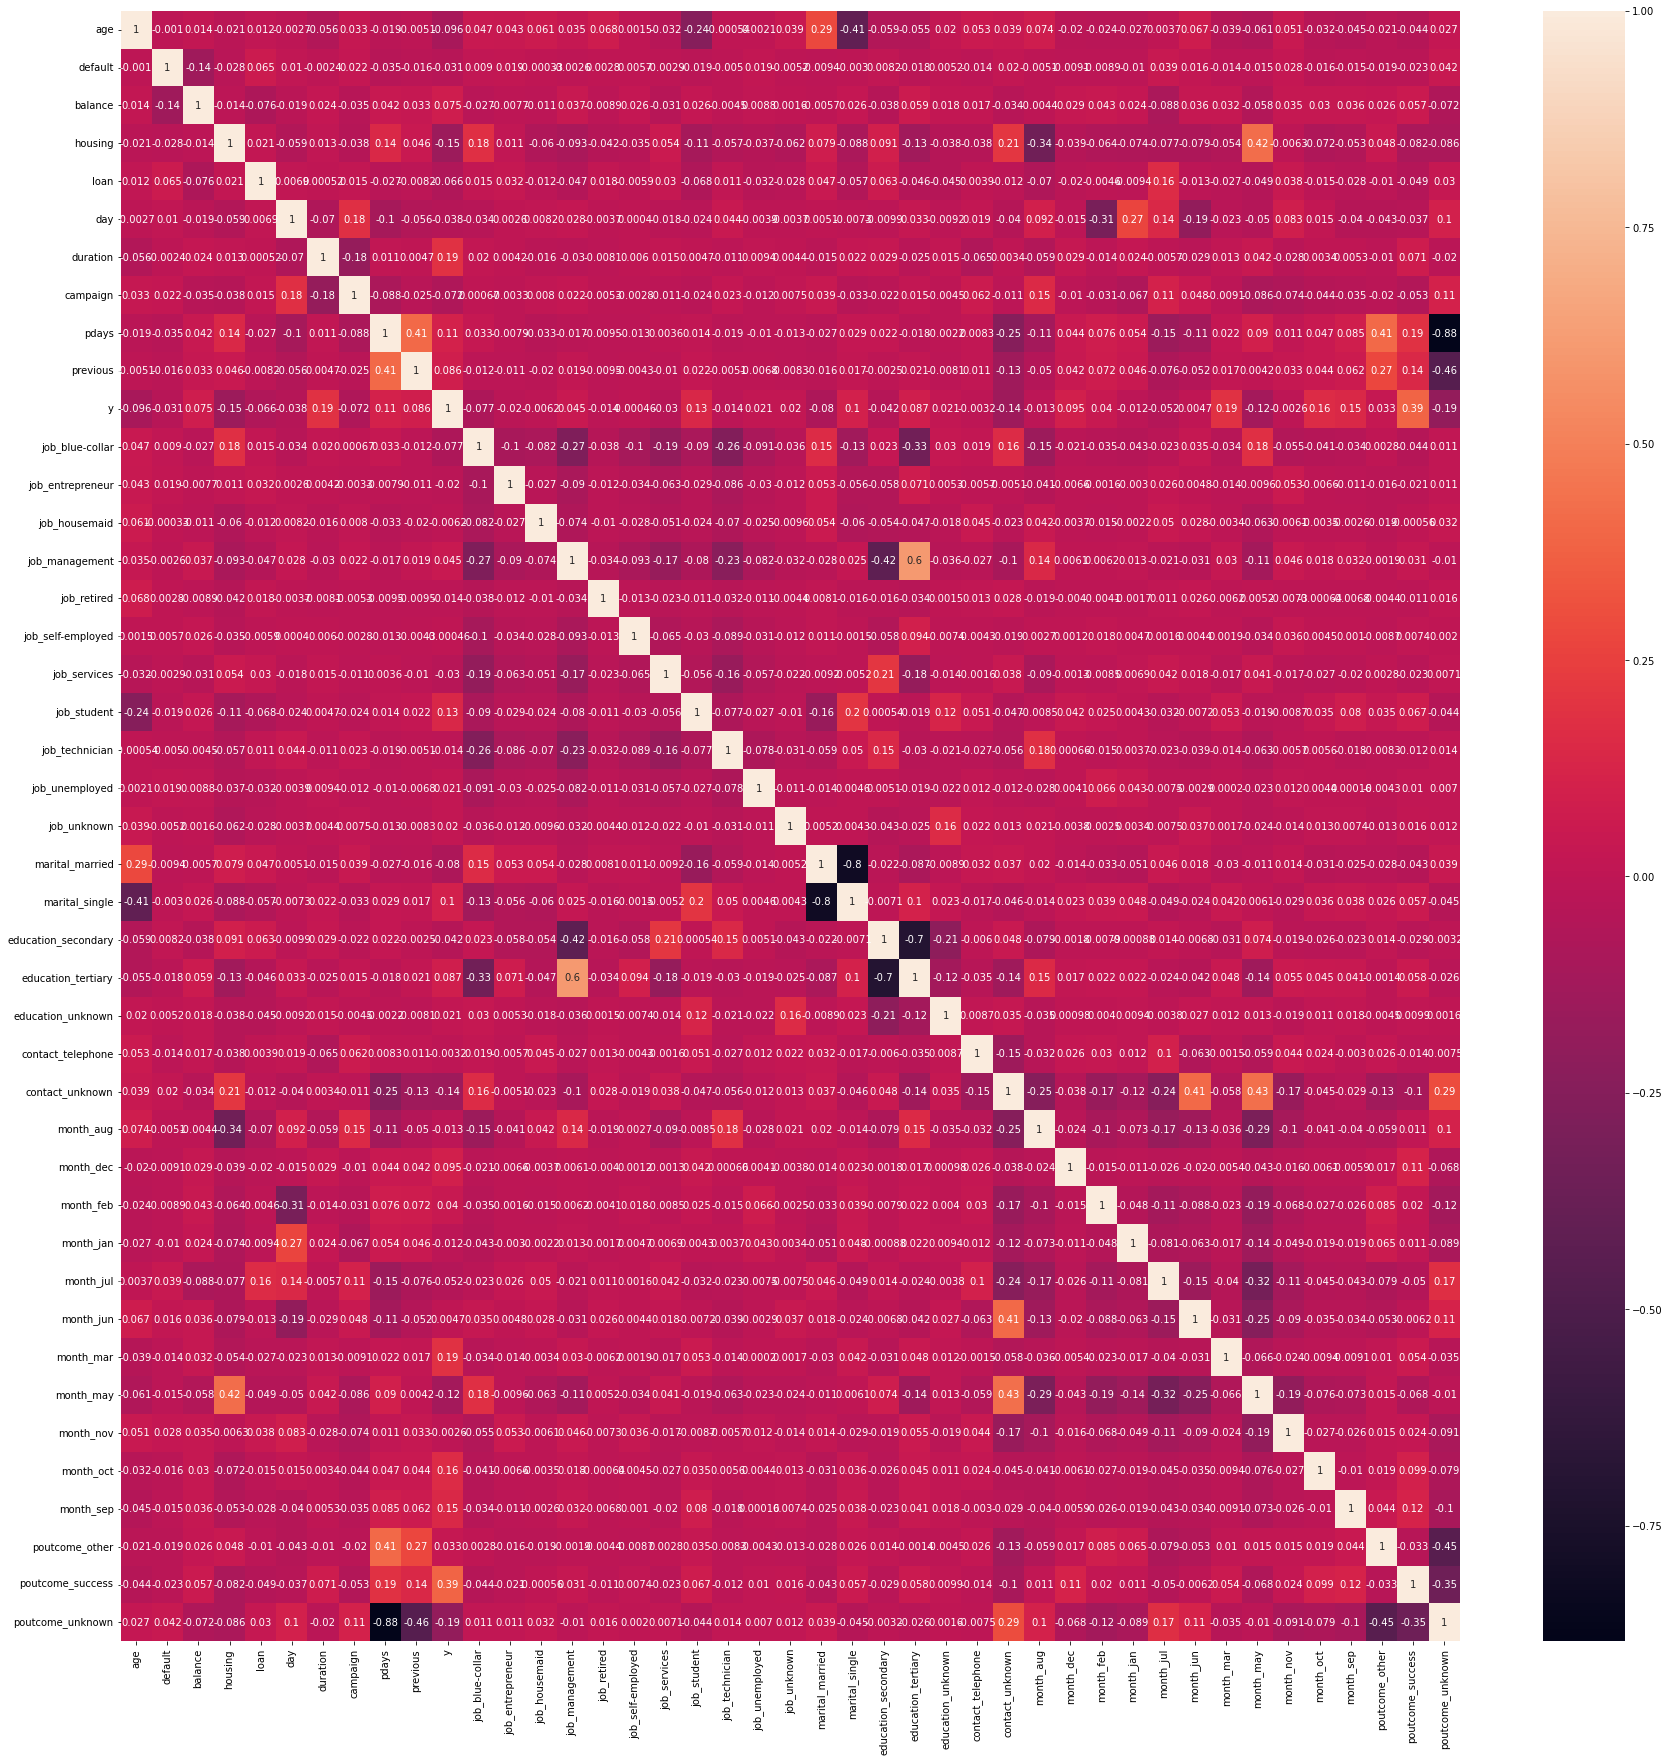

In [207]:
plt.figure(figsize=[30,30])
sns.heatmap(bank_data.corr(),annot=True)

In [216]:
data = bank_data

In [373]:
avnit = banks_data
avnit.head()

,age,job,default,balance,housing,loan,day,month,duration,campaign,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
1,1.069865,9,0,-0.721915,1,0,5,8,-0.243541,1,...,0,1,1,0,0,0,1,0,0,1
2,-0.512576,2,0,-0.796875,1,1,5,8,-0.925795,1,...,1,0,1,0,0,0,1,0,0,1
4,-0.512576,11,0,-0.799651,0,0,5,8,0.184005,1,...,0,1,0,0,1,0,1,0,0,1
5,-0.224860,4,0,-0.161108,1,0,5,8,-0.352702,1,...,1,0,0,1,0,0,1,0,0,1
6,-1.231868,4,0,0.438568,1,1,5,8,0.356842,1,...,0,1,0,1,0,0,1,0,0,1


In [374]:
# Scaling of data : to reduce magnitude of features
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
avnit[['age','balance','duration']] = sc.fit_transform(avnit[['age','balance','duration']])

In [375]:
avnit.head()

,age,job,default,balance,housing,loan,day,month,duration,campaign,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
1,0.81250,9,0,0.349444,1,0,5,8,0.321277,1,...,0,1,1,0,0,0,1,0,0,1
2,0.46875,2,0,0.334444,1,1,5,8,0.161702,1,...,1,0,1,0,0,0,1,0,0,1
4,0.46875,11,0,0.333889,0,0,5,8,0.421277,1,...,0,1,0,0,1,0,1,0,0,1
5,0.53125,4,0,0.461667,1,0,5,8,0.295745,1,...,1,0,0,1,0,0,1,0,0,1
6,0.31250,4,0,0.581667,1,1,5,8,0.461702,1,...,0,1,0,1,0,0,1,0,0,1


<AxesSubplot:>

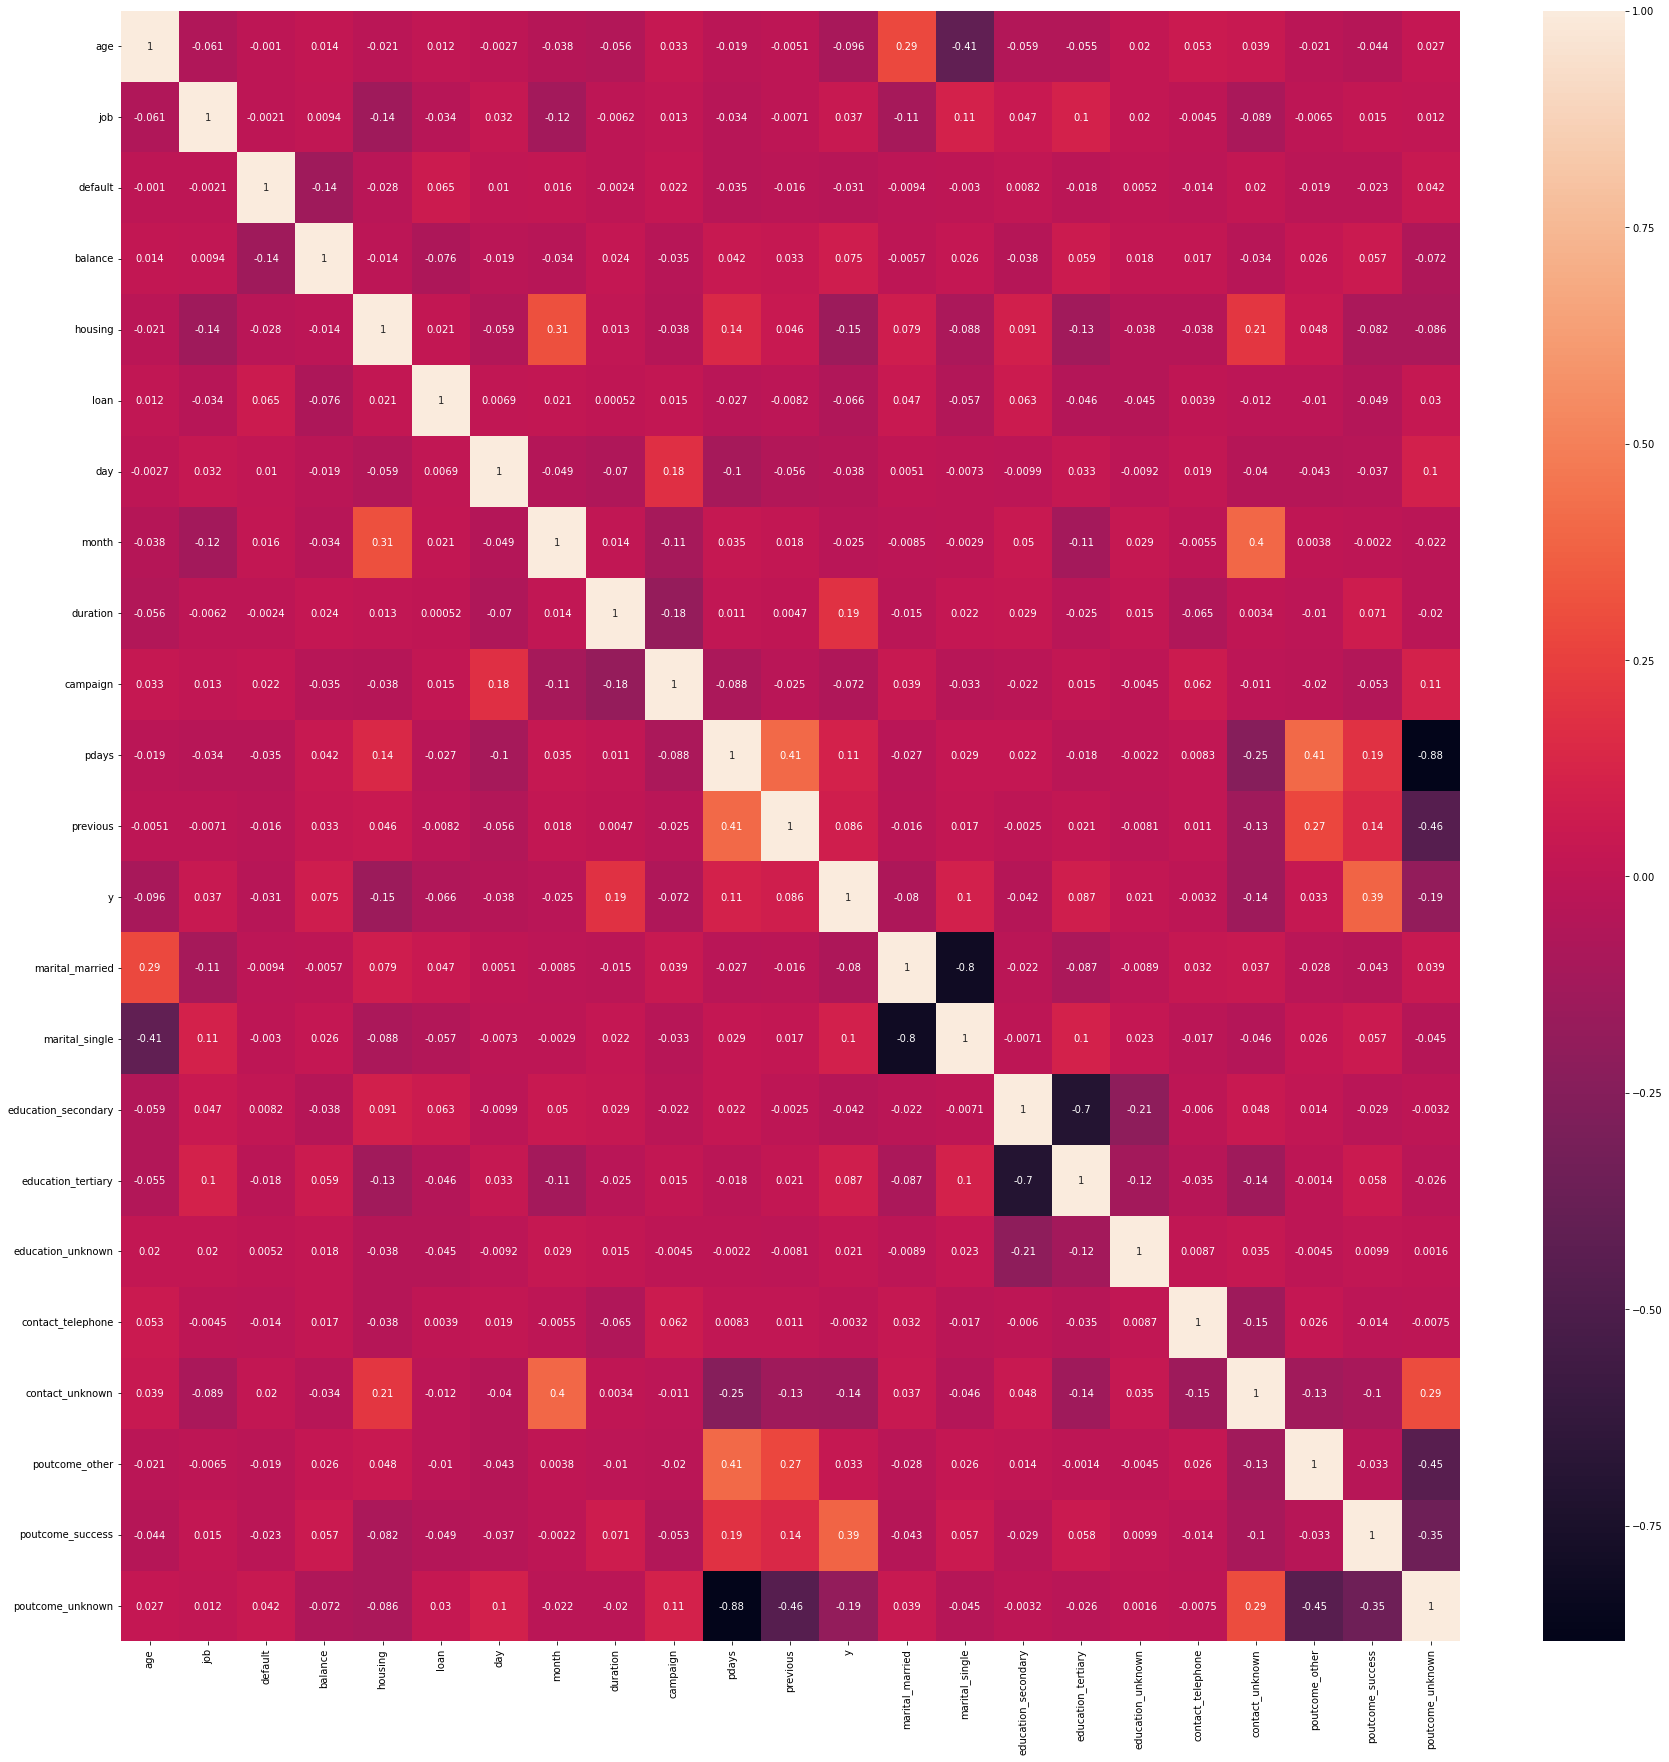

In [376]:
plt.figure(figsize=[30,30])
sns.heatmap(avnit.corr(),annot=True)

In [223]:
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
5,35,0,231,1,0,5,139,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
6,28,0,447,1,1,5,217,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [224]:
new_data = bank_data

In [480]:
# before applying clustering need to caluclate 'k value : no of clusters' using : 

In [225]:
# 1: Silhouette Method
from sklearn.metrics import silhouette_score

In [226]:
from sklearn.cluster import KMeans

In [379]:
no_of_clusters = list(range(2,8))
silhouette_score_list = []

for k in no_of_clusters:
    model = KMeans(n_clusters=k,random_state=1)
    cluster_labels = model.fit_predict(avnit)
    silhouette_score_list.append(silhouette_score(avnit,cluster_labels))

In [380]:
no_of_clusters.insert(0,1)
silhouette_score_list.insert(0,0)

Text(0, 0.5, 'Silhouette Score')

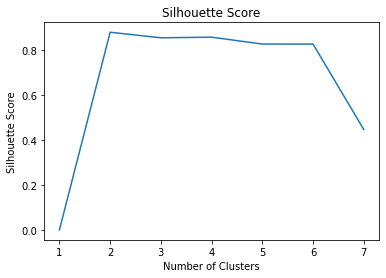

In [381]:
plt.plot(no_of_clusters,silhouette_score_list)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')   
# Here number of clusters can be 2 or 3 as silhouette score(i.e > 0.8) for 2 or 3 clusters is higher.

In [382]:
# 3 : Elbow method
# within clusters sum of squares(wcss) Vs number of clusters


no_of_clusters = range(1,8)
wcss = []

for k in no_of_clusters:
   model = KMeans(n_clusters=k,random_state=1)
   model.fit(avnit)
    
   wcss.append(model.inertia_)  # .inertia_ used to find wcss 


In [383]:
wcss

[249757878.4936459,
 36655242.34329327,
 16797494.7389566,
 11067568.503418596,
 7369376.689315916,
 5036879.088445852,
 4028493.560745913]

Text(0, 0.5, 'WCSS')

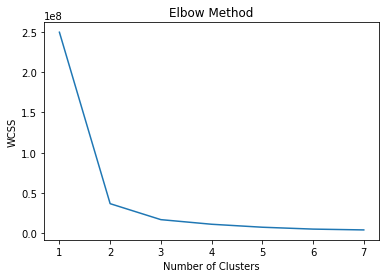

In [426]:
plt.plot(no_of_clusters,wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
# here minimum number of clusters : 3. 
# since Wcss value starts to attain saturation point after 0.25 or constant at 3 clusters. 

In [706]:
### Applying KMeans Clustering 
model = KMeans(n_clusters=3,random_state=42)
labels = model.fit_predict(X)
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [707]:
clusters = model.cluster_centers_
clusters

array([[ 5.82771523e-01,  4.30961589e+00,  2.54304636e-02,
         4.88015570e-01,  5.89139073e-01,  1.81774834e-01,
         1.60414305e+01,  5.48815894e+00,  3.75996956e-01,
         3.00980132e+00, -7.23814570e-01,  2.58543046e-02,
         5.64662252e-01,  3.31390728e-01,  5.51099338e-01,
         2.80105960e-01,  3.45430464e-02,  4.57748344e-02,
         3.61854305e-01,  3.86754967e-03,  1.69536424e-03,
         9.91099338e-01],
       [ 5.73121405e-01,  3.83844679e+00,  1.05465005e-02,
         5.04597848e-01,  8.79194631e-01,  1.48609779e-01,
         1.27689358e+01,  5.62559923e+00,  3.81416128e-01,
         2.18744008e+00,  3.34023490e+02,  3.20182167e+00,
         5.36433365e-01,  3.62416107e-01,  6.00671141e-01,
         2.20997124e-01,  3.06807287e-02,  5.22531160e-02,
         1.67785235e-02,  2.59348035e-01,  4.36241611e-02,
         9.58772771e-04],
       [ 5.59407365e-01,  4.56674338e+00,  8.05523590e-03,
         5.45039637e-01,  5.02876870e-01,  1.60529344e-01,
    

In [708]:
clusters.shape

(3, 22)

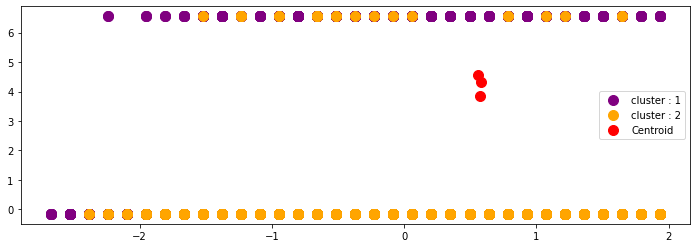

In [709]:
# visualising the clusters
plt.figure(figsize=[12,4])
plt.scatter(df_sc[labels == 0, 0], df_sc[labels == 0, 1], s = 100, c = 'purple', label = 'cluster : 1')
plt.scatter(df_sc[labels == 1, 0], df_sc[labels == 1, 1], s = 100, c = 'orange', label = 'cluster : 2')
#plt.scatter(df_sc[labels == 2, 0], df_sc[labels == 2, 1], s = 100, c = 'green', label = 'cluster : 3')
#plt.scatter(df_sc[labels == 3, 0], df_sc[labels == 3, 1], s = 100, c = 'blue', label = 'cluster : 4')
#plt.scatter(df_sc[labels == 4, 0], df_sc[labels == 4, 1], s = 100, c = 'yellow', label = 'cluster : 5')
#plt.scatter(df_sc[labels == 5, 0], df_sc[labels == 5, 1], s = 100, c = 'red', label = 'cluster : 6')

#Plotting the centroids of the clusters
plt.scatter(clusters[:, 0],clusters[:,1], s = 100, c = 'red', label = 'Centroid')

plt.legend()

In [710]:
from sklearn.metrics import homogeneity_score, completeness_score

In [711]:
homo_score = homogeneity_score(Y,labels)
comp_score = completeness_score(Y,labels)


In [774]:
print(homo_score,   comp_score)   # for 3 clusters

0.08694971804070947 0.033155179990375865


In [770]:
homo_scores = []
comp_scores = []

  
# List of numbers of clusters 
N_Clusters = [2, 3, 4, 5, 6]

#a) n_clusters = 2

model2 = KMeans(n_clusters=2,random_state=42)
labels2 = model2.fit_predict(X)
  
# Evaluating the performance
homo_scores.append(homogeneity_score(Y, labels2))
comp_scores.append(completeness_score(Y, labels2))


#b) n_clusters = 3

model3 = KMeans(n_clusters=3,random_state=42)
labels3 = model3.fit_predict(X)
  
# Evaluating the performance
homo_scores.append(homogeneity_score(Y, labels3))
comp_scores.append(completeness_score(Y, labels3))


#c) n_clusters = 4

model4 = KMeans(n_clusters=4,random_state=42)
labels4 = model4.fit_predict(X)
  
# Evaluating the performance
homo_scores.append(homogeneity_score(Y, labels4))
comp_scores.append(completeness_score(Y, labels4))

#d) n_clusters = 5

model5 = KMeans(n_clusters=5,random_state=42)
labels5 = model5.fit_predict(X)
  
# Evaluating the performance
homo_scores.append(homogeneity_score(Y, labels5))
comp_scores.append(completeness_score(Y, labels5))

#e) n_clusters = 6

model6 = KMeans(n_clusters=6,random_state=42)
labels6 = model6.fit_predict(X)

# Evaluating the performance
homo_scores.append(homogeneity_score(Y, labels6))
comp_scores.append(completeness_score(Y, labels6))
 

In [801]:
homo_scores = []
comp_scores = []

  
# List of numbers of clusters 
N_Clusters = [3, 6, 9, 12, 15]

#a) n_clusters = 2

model2 = KMeans(n_clusters=3,random_state=42)
labels2 = model2.fit_predict(X)
  
# Evaluating the performance
homo_scores.append(homogeneity_score(Y, labels2))
comp_scores.append(completeness_score(Y, labels2))


#b) n_clusters = 3

model3 = KMeans(n_clusters=6,random_state=42)
labels3 = model3.fit_predict(X)
  
# Evaluating the performance
homo_scores.append(homogeneity_score(Y, labels3))
comp_scores.append(completeness_score(Y, labels3))


#c) n_clusters = 4

model4 = KMeans(n_clusters=9,random_state=42)
labels4 = model4.fit_predict(X)
  
# Evaluating the performance
homo_scores.append(homogeneity_score(Y, labels4))
comp_scores.append(completeness_score(Y, labels4))

#d) n_clusters = 5

model5 = KMeans(n_clusters=12,random_state=42)
labels5 = model5.fit_predict(X)
  
# Evaluating the performance
homo_scores.append(homogeneity_score(Y, labels5))
comp_scores.append(completeness_score(Y, labels5))

#e) n_clusters = 6

model6 = KMeans(n_clusters=15,random_state=42)
labels6 = model6.fit_predict(X)

# Evaluating the performance
homo_scores.append(homogeneity_score(Y, labels6))
comp_scores.append(completeness_score(Y, labels6))
 

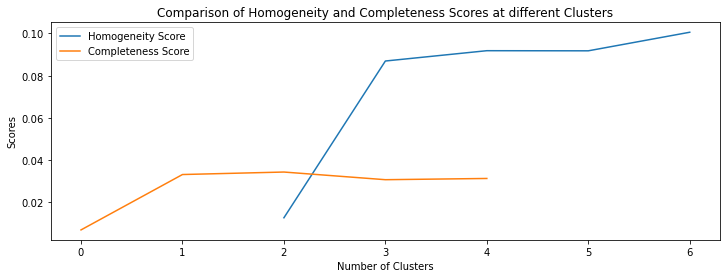

In [771]:
from matplotlib import rcParams
plt.figure(figsize=(12,4))
plt.plot(N_Clusters,homo_scores,comp_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Scores')
plt.title('Comparison of Homogeneity and Completeness Scores at different Clusters')
plt.legend(["Homogeneity Score","Completeness Score"])

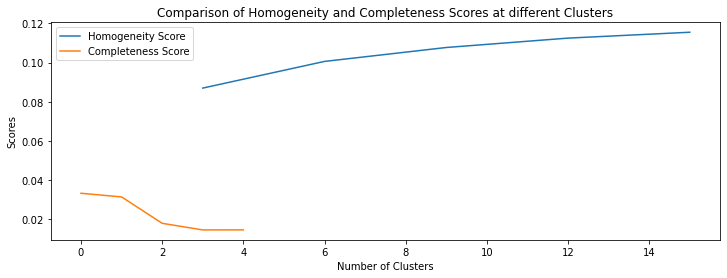

In [802]:
from matplotlib import rcParams
plt.figure(figsize=(12,4))
plt.plot(N_Clusters,homo_scores,comp_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Scores')
plt.title('Comparison of Homogeneity and Completeness Scores at different Clusters')
plt.legend(["Homogeneity Score","Completeness Score"])

In [676]:
# Priciple Component Analysis PCA to reduce dimentions for better visualisation and understanding of data.
from sklearn.decomposition import PCA
pca_data = PCA(n_components=2).fit_transform(avnit)    # n_components is number of dimentions.

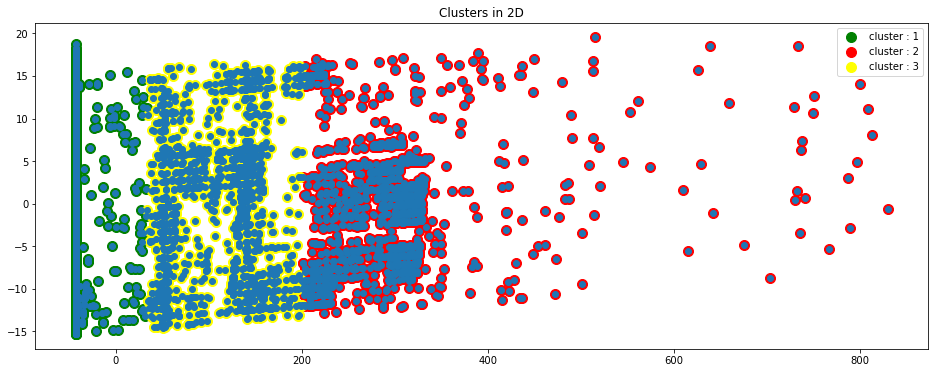

In [716]:
plt.figure(figsize=(16,6))
plt.scatter(pca_data[labels == 0, 0], pca_data[labels == 0, 1], s = 100, c = 'green', label = 'cluster : 1')
plt.scatter(pca_data[labels == 1, 0], pca_data[labels == 1, 1], s = 100, c = 'red', label = 'cluster : 2')
plt.scatter(pca_data[labels == 2, 0], pca_data[labels == 2, 1], s = 100, c = 'yellow', label = 'cluster : 3')
plt.scatter(pca_data[:,0],pca_data[:,1])
plt.title('Clusters in 2D')
plt.legend()
#plt.figure(figsize=(20,10))

In [645]:
pca_data

array([[-42.54814655, -11.14344917],
       [-42.54075623, -11.24392218],
       [-42.55110482, -11.11151422],
       ...,
       [-42.63756342,   0.66650473],
       [-42.64658874,   0.78469977],
       [-42.6504204 ,   0.87877043]])

In [287]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0


In [288]:
bank_data_data = df

In [289]:
bank_data_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0


In [292]:
# performing label encoder to avoid curse of dimentionality since 'job' 
# and 'month' column has many categorical variables.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
print(label_encoder)

bank_data_data["job"] = label_encoder.fit_transform(bank_data_data["job"])
bank_data_data["month"] = label_encoder.fit_transform(bank_data_data["month"])
#new_data["education"] = label_encoder.fit_transform(new_data["education"])

#new_data["contact"] = label_encoder.fit_transform(new_data["contact"])
#new_data["poutcome"] = label_encoder.fit_transform(new_data["poutcome"])
#new_data["y"] = label_encoder.fit_transform(new_data["y"])

#new_data["Days Contacted"] = label_encoder.fit_transform(new_data["Days Contacted"])
#new_data["Age Group"] = label_encoder.fit_transform(new_data["Age Group"])
#new_data["Account Balance"] = label_encoder.fit_transform(new_data["Account Balance"])



LabelEncoder()


In [293]:
bank_data_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,9,single,secondary,0,29,1,0,unknown,5,8,151,1,-1,0,unknown,0
2,33,2,married,secondary,0,2,1,1,unknown,5,8,76,1,-1,0,unknown,0
4,33,11,single,unknown,0,1,0,0,unknown,5,8,198,1,-1,0,unknown,0
5,35,4,married,tertiary,0,231,1,0,unknown,5,8,139,1,-1,0,unknown,0
6,28,4,single,tertiary,0,447,1,1,unknown,5,8,217,1,-1,0,unknown,0


In [294]:
character_cols = bank_data_data.select_dtypes(include=[object])
character_cols

,marital,education,contact,poutcome
1,single,secondary,unknown,unknown
2,married,secondary,unknown,unknown
4,single,unknown,unknown,unknown
5,married,tertiary,unknown,unknown
6,single,tertiary,unknown,unknown
...,...,...,...,...
45193,single,tertiary,cellular,success
45196,single,secondary,cellular,unknown
45202,single,secondary,cellular,unknown
45203,single,tertiary,cellular,unknown


In [295]:
banks_data = pd.get_dummies(bank_data_data,drop_first=True)
banks_data

,age,job,default,balance,housing,loan,day,month,duration,campaign,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
1,44,9,0,29,1,0,5,8,151,1,...,0,1,1,0,0,0,1,0,0,1
2,33,2,0,2,1,1,5,8,76,1,...,1,0,1,0,0,0,1,0,0,1
4,33,11,0,1,0,0,5,8,198,1,...,0,1,0,0,1,0,1,0,0,1
5,35,4,0,231,1,0,5,8,139,1,...,1,0,0,1,0,0,1,0,0,1
6,28,4,0,447,1,1,5,8,217,1,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45193,28,6,0,159,0,0,16,9,449,2,...,0,1,0,1,0,0,0,0,1,0
45196,25,8,0,358,0,0,16,9,330,1,...,0,1,1,0,0,0,0,0,0,1
45202,34,0,0,557,0,0,17,9,224,1,...,0,1,1,0,0,0,0,0,0,1
45203,23,8,0,113,0,0,17,9,266,1,...,0,1,0,1,0,0,0,0,0,1


<AxesSubplot:>

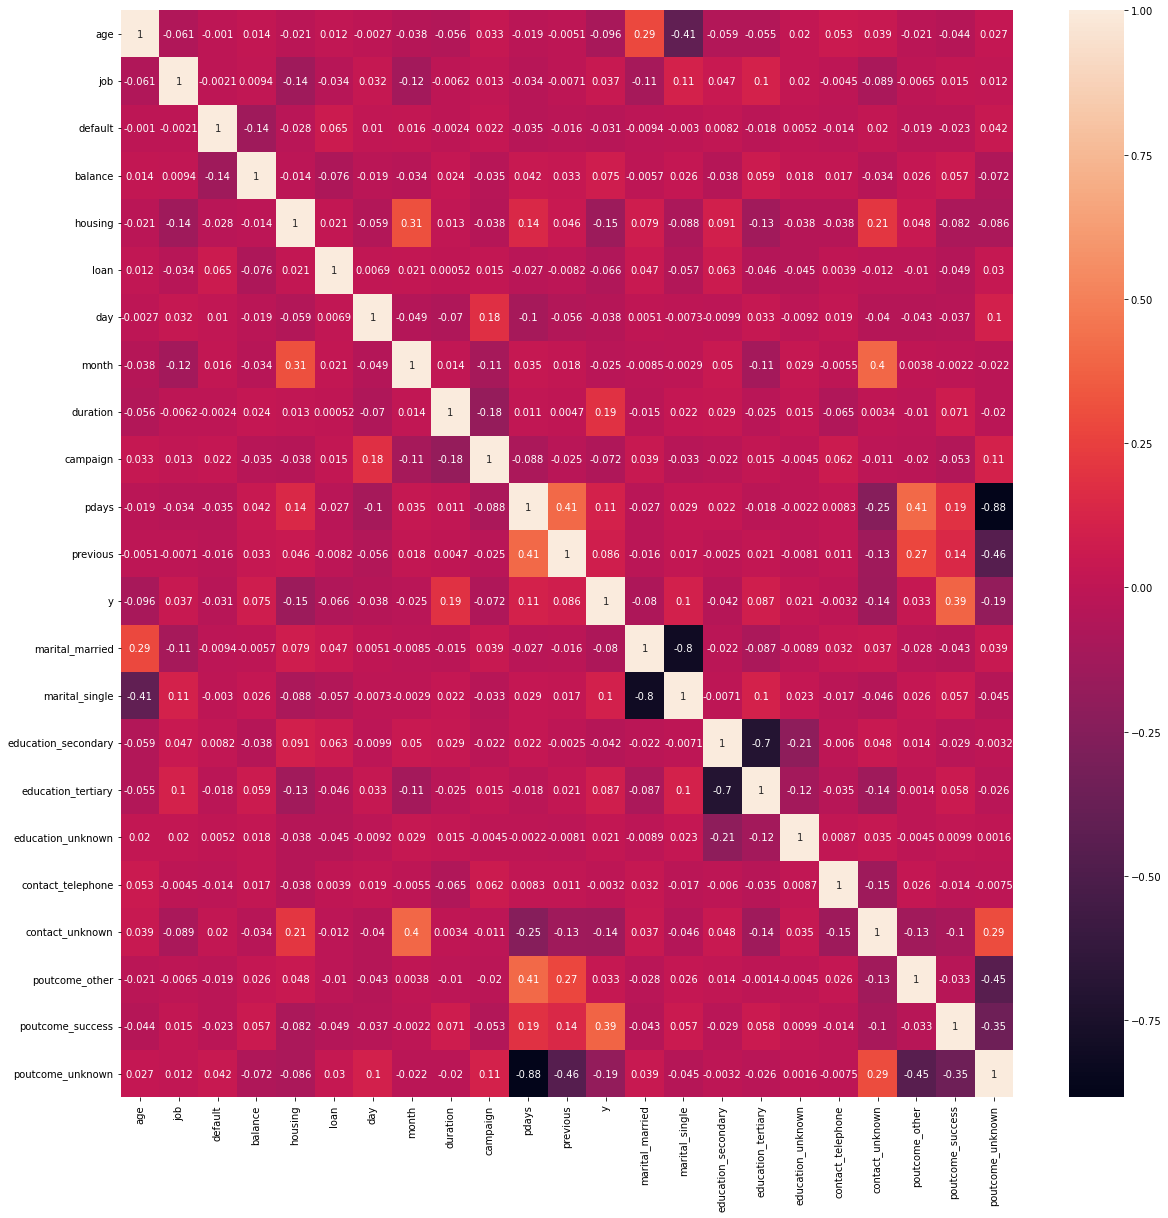

In [297]:
plt.figure(figsize=[20,20])
sns.heatmap(banks_data.corr(),annot=True)

In [399]:
X = avnit.drop(columns='y')
Y = avnit['y']

In [400]:
X.head()

,age,job,default,balance,housing,loan,day,month,duration,campaign,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
1,0.81250,9,0,0.349444,1,0,5,8,0.321277,1,...,0,1,1,0,0,0,1,0,0,1
2,0.46875,2,0,0.334444,1,1,5,8,0.161702,1,...,1,0,1,0,0,0,1,0,0,1
4,0.46875,11,0,0.333889,0,0,5,8,0.421277,1,...,0,1,0,0,1,0,1,0,0,1
5,0.53125,4,0,0.461667,1,0,5,8,0.295745,1,...,1,0,0,1,0,0,1,0,0,1
6,0.31250,4,0,0.581667,1,1,5,8,0.461702,1,...,0,1,0,1,0,0,1,0,0,1


In [401]:
Y.head()

1    0
2    0
4    0
5    0
6    0
Name: y, dtype: int64

In [402]:
# ensemble method to find feature importance

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,Y)

ExtraTreesRegressor()

<AxesSubplot:>

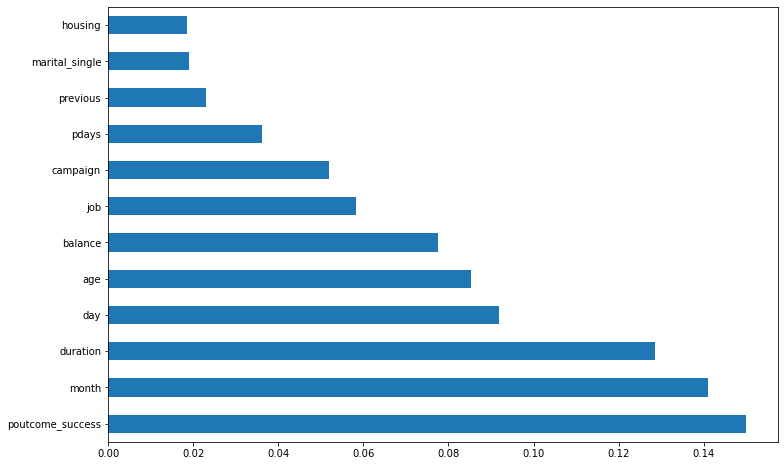

In [403]:
plt.figure(figsize = (12,8))
feature_importance = pd.Series(selection.feature_importances_,index=X.columns)
feature_importance.nlargest(12).plot(kind='barh')

In [405]:
# spiliting data into dependant (X_cols) and target (Y_cols) 
# based on feature importance taken features with more than 75 % correlation with target variable i.e Y_cols .
X_cols = avnit[['poutcome_success','month','duration','day','age','balance']]
Y_cols = avnit['y']   

In [449]:
pip install imblearn

     |████████████████████████████████| 199 kB 531 kB/s eta 0:00:01
     |████████████████████████████████| 8.7 MB 155 kB/s eta 0:00:01     |█████████████████████████▉      | 7.0 MB 193 kB/s eta 0:00:09
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Note: you may need to restart the kernel to use updated packages.


In [506]:
Y_cols.value_counts()

0    21417
1     1282
Name: y, dtype: int64

In [504]:
# performig oversampling since target variable 'y' has imbalance data which will impact model predictions 
# why not undersampling because reducing '0's values according to '1's values will reduce the data point, 
# then model wil not perform well.   
# why oversampling : to increase/balance the data point as to enhance model performance.

In [869]:
from imblearn.over_sampling import RandomOverSampler
rosampling = RandomOverSampler()

In [891]:
X_cls_train,Y_cls_train = rosampling.fit_resample(X_cols,Y_cols)

In [892]:
Y_cls_train.value_counts()

0    21417
1    21417
Name: y, dtype: int64

In [872]:
X_cols.shape, Y_cols.shape

((22699, 6), (22699,))

In [873]:
# apply decision tree classifier for classification


In [874]:
from sklearn.model_selection import train_test_split

In [893]:
X_cols_train, X_cols_test, Y_cols_train, Y_cols_test = train_test_split(X_cls_train,Y_cls_train,train_size=.70,random_state=20)

In [894]:
X_cols_train.shape, Y_cols_train.shape

((29983, 6), (29983,))

In [895]:
from sklearn import tree

In [896]:
model = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=4,max_leaf_nodes=8,random_state=20)

In [897]:
model.fit(X_cols_train,Y_cols_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=8,
                       random_state=20)

In [898]:
Y_cols_prediction = model.predict(X_cols_test)
Y_cols_prediction

array([0, 0, 1, ..., 0, 1, 1])

In [899]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [900]:
confusion_matrix(Y_cols_test,Y_cols_prediction)

array([[4445, 2000],
       [1330, 5076]])

In [901]:
accuracy_score(Y_cols_test,Y_cols_prediction)

0.7408761964049491

In [902]:
print(classification_report(Y_cols_test,Y_cols_prediction))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73      6445
           1       0.72      0.79      0.75      6406

    accuracy                           0.74     12851
   macro avg       0.74      0.74      0.74     12851
weighted avg       0.74      0.74      0.74     12851



/Users/avneetthakur/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y', ylabel='Density'>

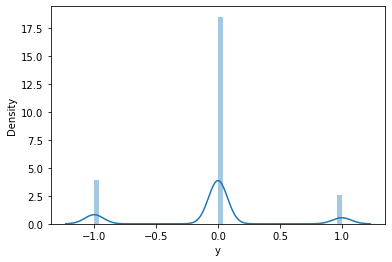

In [960]:
sns.distplot(Y_cols_test-Y_cols_prediction)

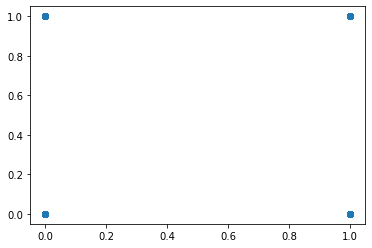

In [959]:
plt.scatter(Y_cols_test,Y_cols_prediction)

In [961]:
from sklearn.metrics import roc_auc_score

In [965]:
roc_auc = roc_auc_score(Y_cols_test,model.predict_proba(X_cols_test)[:,1])
roc_auc                     

0.8137036845064036

In [966]:
from sklearn.metrics import roc_curve

In [969]:
fpr,tpr,thresholds = roc_curve(Y_cols_test,model.predict_proba(X_cols_test)[:,1])

Text(0.5, 1.0, 'Area Under Curve')

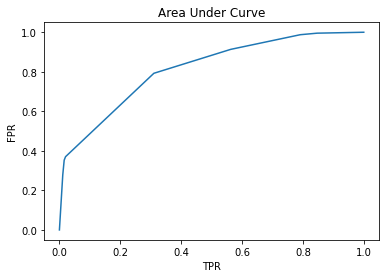

In [973]:
plt.plot(fpr,tpr)
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.title('Area Under Curve')

In [944]:
print(Y_cols_prediction)

[0 0 1 ... 0 1 1]


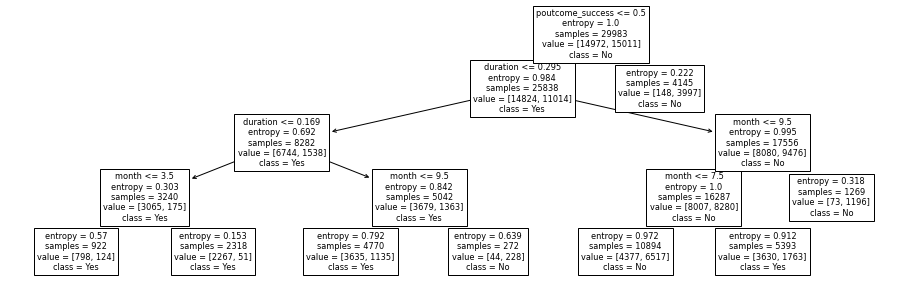

In [907]:
from sklearn import tree
plt.figure(figsize=(16,5))
tree.plot_tree(model,feature_names=X_cols_train.columns.values,class_names=['Yes','No']);

In [908]:
## applying logistic regression

In [909]:
from sklearn.linear_model import LogisticRegression

In [924]:
X_col_train, X_col_test, Y_col_train, Y_col_test = train_test_split(X_cls_train,Y_cls_train,train_size=0.70,random_state=20)

In [925]:
model_1 = LogisticRegression(random_state=100)

In [926]:
model_1.fit(X_col_train,Y_col_train)

LogisticRegression(random_state=100)

In [927]:
Y1_cols_prediction = model_1.predict(X_col_test)
Y1_cols_prediction

array([1, 1, 0, ..., 0, 1, 0])

In [928]:
confusion_matrix(Y_col_test,Y1_cols_prediction)

array([[5039, 1406],
       [2033, 4373]])

In [929]:
accuracy_score(Y_col_test,Y1_cols_prediction)

0.7323943661971831

In [930]:
print(classification_report(Y_col_test,Y1_cols_prediction))

              precision    recall  f1-score   support

           0       0.71      0.78      0.75      6445
           1       0.76      0.68      0.72      6406

    accuracy                           0.73     12851
   macro avg       0.73      0.73      0.73     12851
weighted avg       0.73      0.73      0.73     12851

